# Chapter 11. Training Deep Neural Networks

Trong chapter 10, chúng ta đã giới thiệu  vể ANN và trained our first dêp neural networks. Nhưng chúng ta chỉ đang xửu lý vài hidden layer. Vậy sẽ ra sao nếu bạn sẽtackle 1 vấn đề lớn như, hát hiện 100 đối tượng trong 1 hình ảnh có độ phân giải cao. Train a deep DNN không phải **isn't walk in the park**. Đây sẽ là 1 vài ví dụ bạn sẽ có thể đi vào dưới note book này 

* đó chính là *vanishing gradients* *exploding gradients*
* không đu dữ liệu training cho 1 mạng lưới lớn , hoặc quá đát để mình gãn label 
* trianing có thể chậm 
* Overfitting the training set, hoặc thiếu training instances hoặc chúng quá là khó hiểu. 

Note book này sẽ going tất cả các vấn đề ở rteen và chúng ta sẽ có 1 vài kỹ thuật để giải chúng. CHúng ta sẽ bắt đàu exporing với *vanishing and exploding* gradinet. Tiếp đến chúng ta sẽ đi dến *transfer learning* và *unsupervised pretraining* nó có thể hỗ trợ chúng ta tiếp cận những vấn đề lớn ngay cả khi chúng ta có ít label. Rồi chúng ta sẽ thảo luận các tối ưng để tăng lượng speed up khi train 1 với 1 mô hình lớn. Và chúng ta sẽ đi qua 1 vài những technich regularzation cho tập lớn mạng lưới neraul  

## The Vanishing/Exploding Gradients Problems

Như chúng ta đã thảo luận trong **Chapter 10**, the backpropagation algo hoạt động bằng cách đi từ output layer to input layer, lan truyền thẻ **error gradient** dọc theo dường đi.Khi thuật toán đã tính gradient của hàm mất mát liên quan tới từng tham số trong network , nó sử dụng gradient để update các parameter với a Gradient Descen step.

Thật không may, gradient thường lấy giá trị nhỏ và và nhỏ hơn khi thuật toán đi tới xuống các layer dưới. Như một kết quả, the Gradeint Descen update cập nhật các connection weight ở dưới hầy như như không thay đổi, và sẽ ko bao giờ đạt được good solution. Chúng tôi gọi là **vanishing gradients** problem. Trong 1 vài trường hợp nó có thể xảy ra, gradient có thể càng lớn và lớn hơn cho đến khi các lớp nhận được cập nhật trọng lượng cực lớn và thuật toán đó là phân kỳ. Đó là **exploding gradient**.Nói một cách tổng quát hơn, các mạng nơ-ron sâu có độ dốc không ổn định; các lớp khác nhau có thể học ở nhiều tốc độ khác nhau. Nói ngắn gọn, họ đã chỉ ra rằng với this activation và init scheme the variance của outputs của mỗi layer lớn hơn rất nhiều variance của inputs. Vào trong cái network, phương sai sẽ tiếp tục tăng sau khi mỗi layer cho đến activation function ở các lớp trên cùng. Sự saturation thực sự tồi tệ bởi thực sự nó là hàm logistic có trung bình 0.5 chứ ko 0 .Do đó,khi quá trình lan truyền khi backgrogation truyền qua nó hầu như không có  gradient truyền ngược lại the network , và những cái ít graindent tồn tại tiếp tục bị lõng như backproapgation tiến xuống các lớp trên cùn, và điều đó là thực sự k có còn gì cho các lớp dưới  

### Glorot and He Initialization
Trong bài báo của, Glorot and Bengio đã đề xuất 1 cách đáng kể vấn đề Gradient không ổn đinh. Họ đề xuất 1 cáchh giảm đáng kể vấn đề gradient không ổn đinh. Họ chỉ ra rằng chúng ta cần tín hiệu lưu thông đúng theo cả 2 hướng, theo hướng đằng trướng khi chúng ta predictions, và theo hướng ngược lại khi backprogating gradient. Chúng tôi không muốn tín hiệu bị tắt cũng như chúng tôi không muốn nó bão hoà hay bùnh nổ. Để tín hiệu đi đúng hướng các tác giả lập luận rằng chúng ta cần variance của outputs của outputs của mỗi layes bằng variance của input. và chúng ta cần gradient và chúng ta cần các gradient có phương sai bằng nhau trước và sau khi chảy qua một lớp theo hướng ngược lại. Nó thực sự không Thực sự không thể đảm bảo cả hai trừ khi lớp có số lượng đầu vào và tế bào thần kinh bằng nhau . nhưng Glorot và Bengio đã đề xuất một thỏa hiệp tốt đã được chứng minh là hoạt động rất tốt trong thực tế: trọng số kết nối của mỗi lớp phải được khởi tạo ngẫu nhiên như công thức dưới đây 

$fan_{avg} = (fan_{in} + fan_{out})/2$

Phân phối chuẩn với MAEN = 0 và 
variance $\sigma^{2}$ = $\frac{1}{fan_{avg}}$

default, keras sử dụng Glorot init với phân phối đồng nhất. khi tạo 1 layer, chúng ta có thêr thay đổi this to He init bởi setting 

```
keral_initializer="he_uniform" or 
keral_inittializer="he_normal" 

keras.layers.Dense(10,activation="relu",kernel_inititalizer="he_norlmal"
```
Nếu bạn muốn He Init với 1 uni form distribution nhưng dựa trên on $fan_{avg}$ thay vì $fan_{in}$ bạn có thể sửu dụng VarianceScaling inittialier like this:

```
he_avg_init = keras.initializers.VarianceScaling(scale=2,mode="fan_avg",
distribution='uniform'
keras.layers.Dense(10,activation="sigmoid",kernel_inittializer=he_avg_init)
```

### Nonsaturating Activation Functions
Một trong những hiểu biết sâu sắc trong 2010 là vấn đề với **unstatble gradient** là 1 phần do lựa chọn sai activation function. Vì hầu hết mọi người đều nghĩ rằng mặc định `sigmoid` activation trong bioligical neurasl. Nó là sự lựa chọn oke nhất tại thời điểm đó. nhưng cái khác hoạt động tốt hơn trong deep neural networkds trong thực tế đó là ReLu activation function. chủ yếu vì nó không **saturate** cho giá trị dương và nó tính nhanh.

Thật không may, ReLU activation function không thực sự tốt. Nó mắc phải 1 vấn đề được biết là **dying ReLUs** trong suốt quá trình huấn luyện , 1 vài tế bào sẽ chết nghĩa là chúng sẽ dừng output không khác gì 0. Trong 1 vài trường hợp, bạn có thể thấy một nửa netwwork's neurosn sẽ chết nếu chúng ta sử dụng 1 lượng lớn large learning rate. 1 Neuron **dies** khi trọng số của nó được điều chỉnh theo 1 cách tổng các weight của input là số âm cho tất cả các thành phần của tập huấn luyện. Khi điều này xảy ra, nó sẽ giữ input là 0 và Gradient Descen không phát huy tác dụng nữa.

Để sử lý vấn đề này, bạn có thể sử dụng 1 biến thể của ReLu function ví dụ như là *leaky* ReLU. Func này được định nghĩa 
$LeakyReLU_{\alpha}(z) = max(\alpha z,z)$

Hyperparameter $\alpha$ được định là bao nhiêu cái mà function này nó bị *leak*. nó là 1 small độ dốc mà thiếu ReLus để nó không chết. A paper 2015 đã so sánh ReLU activation , và 1 các biết thể của nó và đã kết luận rằng **leaky ReLu** luông luôn có output tốt hơn.
*  **RReLu**(xử lý tốt  và hoạt đông như là 1 reguarizer) 
*  **PReLu** xử lý cực tốt hơn ReLU trên image dataset 
Còn 1 cái nhưng k kém phần quan trọng. **ELU**  (exponential linear unit) output xử lý tốt hơn perfornane các biến thể của ReLU



$$ELU_{\alpha}(z) = \left\{ \begin{array}{rcl}
{\alpha}(exp(z)-1\ & \mbox{if}
& z<0 \\ z & \mbox{for} & z>= 0
\end{array}\right.$$

The ELU activation Function nhìn có thể giống nhu ReLU nhưng có 1 vài điểm khác biệt 
* Nó nhận các giá trị âm khi z <0, cho phép đơn vị có đầu ra trung bình gần với 0 và giúp giảm bớt vấn đề về độ dốc biến mất. Hyperparameter α xác định giá trị mà hàm ELU tiếp cận khi z là một số âm lớn. Nó thường được đặt thành 1, nhưng bạn có thể điều chỉnh nó giống như bất kỳ siêu thông số nào khác  
* Tránh z < 0  dead neurons 

Điểm hạn chế của ELU là nó chậm tính toán hơn ReLUTốc độ hội tụ nhanh hơn của nó trong quá trình đào tạo bù đắp cho tính toán chậm đó, tuy nhiên, tại thời điểm thử nghiệm, mạng ELU sẽ chậm hơn mạng ReLU 

Trong 2017 paper, đã giới thiệu SELU activation, nó là 1 biến thể được chia tỷ lệ của ELU.  SELU activation function network sẽ tự chuẩn hoá outpur sẽ hướng tới mean =0 std = 1 xuyên xuốt quá trình traning set , nhưng nó cvài điều kiện sau đây: 

* Input phải standardized 
* Mỗi hidden latet phải init bằng kernel_init ="lecun_normal" 
* Architecture phải sequental 
* tất cả layer là dense kết nối full, nhưng 1 vài nghiên cứu nói rằng SELI có thể improve performance trong CNN. 

Để sử dụng leaky ReLU activation, create **Leaky ReLu** layet and thêm nó vào model 
```
model = keras.modesl.Sequantial([
  keras.layers.Dense(10,kernel_initlizer="he_normal",
  keras.layers.LeakyReLU(alpha=0.2)
])

```
Với PReLU, replace cái LeakyRelu với PReLU()

Với thằng SELU set activation ="selu" và set cái init là lecun_normal" cái này bắt buộc nhac 

### Batch Normalization

Mặc dù sử dụng He Init vcùng với ELU hoặc với bất kỳ biết thể nào của RELU , nó có là giảm đáng kể sử nguy hiểm của vanisshing/ exploding gradients tại bắt đầu huấn luyện, nhưng nó k đảm bảo rằng chúng không thể quay lại xuyên suốt trong quá trình đào tạo 

Trong 1 tờ 2015 paper Sergey Ioffe and Chirstian Szegedy đã chứng minh rằng 1 kỹ thuật được gọi là *Batch Normalization* (BN) sẽ xử lý vấn đề ở trên. Cái kỹ thuật này bao gồm thêm những operation trong model ngay trước hoặc sau mỗi activation function cho mỗi hidden layer. Operation này chỉ đơn giản là định tâm và chuẩn hóa từng đầu vào, sau đó chia tỷ lệ và thay đổi kết quả bằng cách sử dụng hai vectơ tham số mới trên mỗi lớp , 1 cho scaling và cái khác cho shifting. Mặt khác các operation hướng tới model học các tối ưu scale và mean của mỗi layers in put. Trong nhiều trường hợp nếu chúng ta thêm 1 BN layers như là first layer trong network thì chúng ta **không cần phải Standarscaler**

#### Implementing Batch Normalization with KEras 

In [1]:
#import library 
import tensorflow as tf
from tensorflow import keras


In [2]:
#import data set 
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.dtype

dtype('uint8')

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
 
# set seed 
tf.random.set_seed(42)
# Creating the model with Sequential API
model_batch_normalization = keras.models.Sequential([
          keras.layers.Flatten(input_shape=[28,28]),
          keras.layers.BatchNormalization(),
          keras.layers.Dense(300,activation='elu',kernel_initializer='he_normal'),
          keras.layers.BatchNormalization(),
          keras.layers.Dense(100,activation="elu",kernel_initializer='he_normal'),
          keras.layers.Dense(10,activation='softmax')
])
# compiling the model
model_batch_normalization.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics =['accuracy']
)
# Fiting the model
model_batch_normalization.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4713 - accuracy: 0.8313
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3553 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3163 - accuracy: 0.8827
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2901 - accuracy: 0.8911
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2686 - accuracy: 0.8989
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2504 - accuracy: 0.9055
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2349 - accuracy: 0.9105
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2250 - accuracy: 0.9141
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2068 - accuracy: 0.9211
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

Các tác giả của bài báo về BN đã lập luận ủng hộ việc thêm các lớp BN trước các **activation function**, thay vì sau (như trên vừa làm). Có một số cuộc tranh luận về điều này, vì điều nào tốt hơn dường như phụ thuộc vào **my problem** cũng có thể thử nghiệm điều này để xem tùy chọn nào hoạt động tốt nhất trên dataset. Để thêm các lớp BN trước các "activation functon"t, ta phải xóa "activation functon"t khỏi các Hidden layer và thêm chúng dưới dạng các lớp riêng biệt sau các lớp BN.Thêm nữa, vì Batch Normalization layer bao gồm thêm 1 ofset parameter trong mỗi input, chúng ta có thể remove bias từ các layer trước

In [6]:
# set seed 
tf.random.set_seed(42)
# Create the model with Sequential API 
model_batch_normalization_author = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),  
    keras.layers.BatchNormalization(),
    keras.layers.Activation('elu'),
   
    keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),    
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10,activation="softmax")                                        
])
# Compile the model 
model_batch_normalization_author.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics =['accuracy']
)
# Fit the model 
model_batch_normalization_author.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4895 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3911 - accuracy: 0.8581
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3534 - accuracy: 0.8701
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3297 - accuracy: 0.8783
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3078 - accuracy: 0.8852
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2917 - accuracy: 0.8917
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2786 - accuracy: 0.8949
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2674 - accuracy: 0.8997
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2522 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

  ### Gradient Clipping 

1 Kỹ thuật được sử dụng rất nhiều phổ biến  để giảm thiểu sự *exploding gradients* là cắt gradients xuyên suốt backpropagation để chúng không boa giờ vượt qua ngưỡn nào đó. ĐÓ được gọi là **Gradient Clipping**. Đây là kỹ thuật thường được sử dụng RNN, vì Batch Normalization là khó sử dụng. Với các loại networks thì thằng Bn là sự hợp lý nhất. 

Trong KEras, sử dụng **Gradient Clipping** chỉ là 1 set *clipvalue or clipnorrm* khi tạo optimizer 

```
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='mse',optimizer=optimizer)
```

Cái optimizer ở trên sẻ cắt tất các phần tử trong gradient vector để giáo sẽ nằm ở -1,1. Điều này có nghĩa là tất cả các đạo hàm riêng của loss fnc đều cắt từ -1, 1. Nó có thể thay đổi hướng của gradient vector, ví dụ nếu cái giá trị vector ban đầu là [0.9,100.0] nó sẽ cắt là khoả [0.9,1.0] nó sẽ đi về hướng ở giữa 0.9, 1.0. Nếu bạn muốn đảm bảo rằng Gradient Cluipping không thay đổi cái hướng của gradient vector, bạn cần cắt bởi norm bởi setting `clipnorrm` thay vì `clipvalue`. 

## Resuing Pretrained Layers 

Sẽ dường như không phải là một ý tưởng tốt khi chúng ta training 1 verry large DNN lớn từ ban đầu. Thay vì như thế  chúng ta nêu luôn luôn tìm 1 existing neural netwwork hàn thành 1 các task vụ gần giống  như cái của chúng tay và cố gắng tác động chúng và sử dụng lay nhưng layerr của network đó. Đây 1 là kỹ thuật được gọi là **Transfer Learning**. Nó sẽ không chỉ tăng khả năng traing, nó ũng có thể giảm đáng kể tập dữ liệu 

Giả sử bạn có 1 csss DNN đã traing và phân tích 1 picturte thành 100 catergories bao gồm animals, plats, vehicles, và etc. Bạn cần muốn train DNN classifiey speicif type của xe máy, các task này khá giống nhau thậm trí trùng lặp chúng ta nên sử dụng lại cái firrst networks 

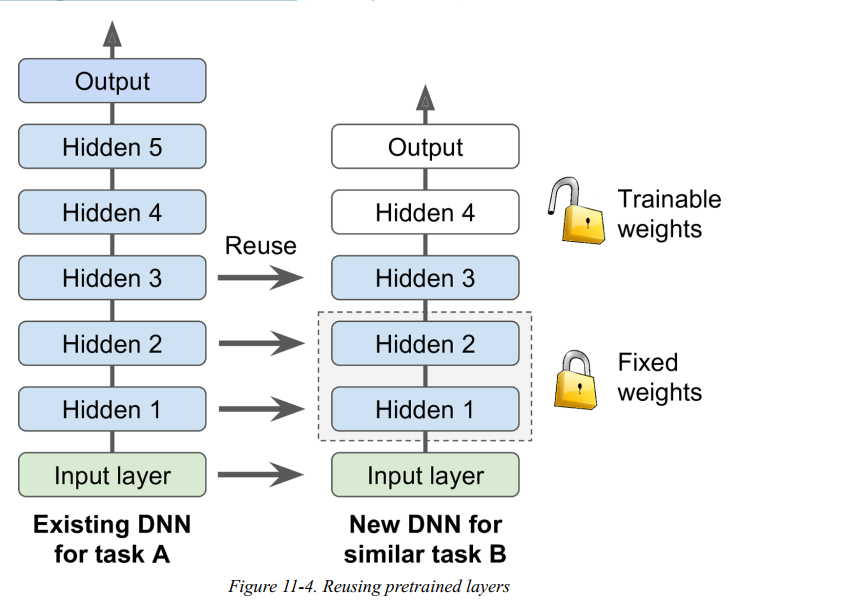

**NOTE**: Nếu các input pictures của task của mình không có the same size như sử dụng original táks, bạn sẽ sử dụng có thể preprocessing step để resizie chúng to size của orginal model. Tổng quát hơn, transfer learning sẽ làm vêicj tốn nhất khi input similer low-level featues 

Lớp đầu ra của mô hình ban đầu thường nên được thay thế vì nó rất có thể không hữu ích cho tác vụ mới và thậm chí nó có thể không có đúng số lượng đầu ra cho tác vụ mới.

Đầu tiên đóng băng tất cả các resue layes đầu tiên.  và train model performace nhìn hiệu suất. và có gắng unfrezing one hoặc n2 của top hidder để backpropagation chỉnh sửa chúng và nhìn nếu hiệu suất có tăng lên.

### Transfer Learning with Keras
Chúng ta có 1 ví dụ giả sử Fashin MNIST dataset chỉ bao gồm 8 class tất cả ngoại trừ sandal và shirrt. Và có ng đã build trained a Kearsa trên tập set đc 90& accuracy. Và chúng ta gọi nó là model A. Bạn bây giờ muốn hành đọng các task khác, diferent task. bạn có ảnh của sandals và shirrts và muốn train binarry shirrt negative sandal. Tập dữ liệu của bạn khá nhỉ chỉ khoảng 200 hình ảnh, khi bạn train 1 model mới cho task này ( gọi là midek B) với the same kiến trúc như A , performance tốt đến 97.2 %. Và chúng ta có thể dùng transfer learnign có thể help cao hơn 97.2  

 Vì k có model A thì chúng ta phỉa làm trước hết load data

In [21]:
fashion_mnist_data = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) =  fashion_mnist_data.load_data()

Import pandas and numpy make tweak data into 8 class except for scandal and shirt 

In [22]:
import pandas as pd
import numpy as np


In [23]:
# Reshape to 784 features
X_train_series = X_train.reshape(len(X_train),784)
X_train_series

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
X_train_pd = pd.DataFrame(X_train_series)
X_train_pd["label"] = y_train

In [25]:
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train_pd['label']

0        9
1        0
2        0
3        3
4        0
        ..
59995    5
59996    1
59997    3
59998    0
59999    5
Name: label, Length: 60000, dtype: uint8

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
options = [5,6]

In [28]:
data_anorther = X_train_pd[~X_train_pd['label'].isin(options)]
data_shirt_sandals = X_train_pd[X_train_pd['label'].isin(options)]

In [29]:
data_anorther['label'] == 5

0        False
1        False
2        False
3        False
4        False
         ...  
59993    False
59994    False
59996    False
59997    False
59998    False
Name: label, Length: 48000, dtype: bool

In [30]:
data_shirt_sandals['label'].isin([5,6])

8        True
9        True
12       True
13       True
18       True
         ... 
59983    True
59987    True
59988    True
59995    True
59999    True
Name: label, Length: 12000, dtype: bool

In [31]:
X_train_another = data_anorther.drop(labels='label',axis=1)
y_train_anoter = data_anorther['label']


In [32]:
test = X_train_another.to_numpy()
test.reshape(len(test),28,28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [33]:
# Convert origin after filter 
X_train_another= X_train_another.to_numpy().reshape(len(test),28,28)


Now let's create the model_A after preprocessing

In [35]:
# for i in y_train_another[:5]:
#   print(i )
#y_train_another[1].assgin
#y_train_another[1].assign(2) // 0
y_train_another = y_train_another.numpy()
# for i in y_train_another:
#   if()

NameError: ignored

In [36]:
y_train_another = tf.convert_to_tensor(y_train_anoter)

In [37]:
# Normalization model 
X_train_another_norm = X_train_another/255.0
X_train_another_norm = tf.convert_to_tensor(X_train_another_norm)
X_train_another_norm

<tf.Tensor: shape=(48000, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [38]:
# Creat seed 
tf.random.set_seed(42)
# Creating the model
model_A = keras.models.Sequential([
              keras.layers.Flatten(input_shape=(28,28)),
              keras.layers.Dense(12,activation='relu'),
              keras.layers.Dense(12,activation='relu'),
              keras.layers.Dense(10,activation='softmax')
])
# Compile the model
model_A.compile(loss= keras.losses.SparseCategoricalCrossentropy(),
                optimizer=  keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_A = model_A.fit(X_train_another_norm,y_train_another,epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4797 - accuracy: 0.8388
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2920 - accuracy: 0.9017
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2730 - accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2636 - accuracy: 0.9113
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2558 - accuracy: 0.9143
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2475 - accuracy: 0.9160
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.9170
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2343 - accuracy: 0.9204
Epoch 9/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2311 - accuracy: 0.9190
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.225

In [39]:
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                9420      
_________________________________________________________________
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
Total params: 9,706
Trainable params: 9,706
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

In [41]:
model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid"))

Hãy nhớ rằng `model_A` và `model_B_on_A` bây giờ chia sẻ 1 vài layers. khi bạn train `model_B_on_a`, nó có xúng gây ảy hưởng `model_a` nếu bạn muốn tránh điều đó thì bạn cần phải *clone* model _A trước khi sử dụng lại layers này. Để làm điều đó bạn cần clone cấu trúc của model'a với `clone model()` và coppy weight của nó. vì `clone_model()` không clone weight s

In [42]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

Bây giờ bạn có thể train `model_B_on_A` cho task B, nhưng bì new ouput latyers sẽ init random nó sẽ làm 1 lượng lỗi. vì thế nó sẽ gây tới nhiều lỗi gradients có thể giảm weight. Tránh điều đó, 1 cách hướng tiếu cận là freeze cái mà mình reused layers xuyên xuốt 1 vài epochs. cho những layer 1 và thời gian để học tìm ra weights hợp lý. để làm được điều này set mỗi lảy trainable attribtutes to False 


In [43]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainble = False

 và rồi mình sẽ train nó 1 vài epochs để nó hiểu rồi mình sẽ trainh tiếp như hình dưới đây 

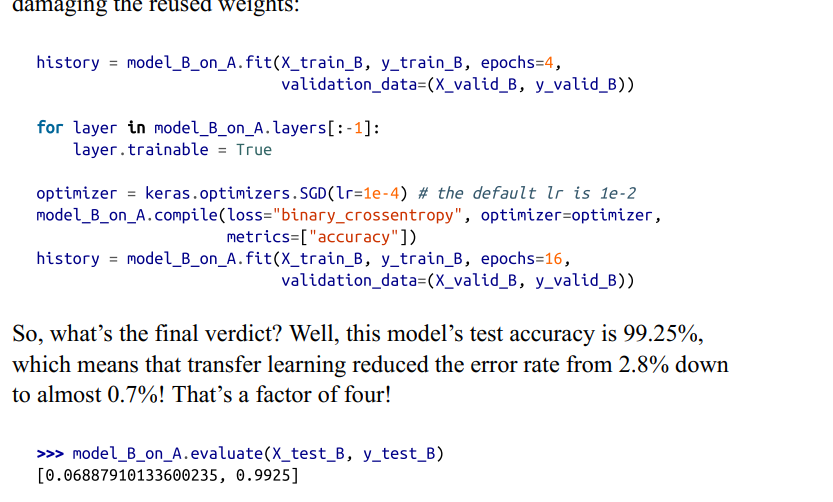

### Unsupervised Pretraining 


Giả sử bạn muốn giải quyết 1 vấn đề phức tạo nhưng bạn không có nhiều labeld trong training data, nhưng chửng may bạn không tìm 1 model đã training 1 similart task. Đừng mất, hi vọng bạn nên thu thập thêp label trong tập dữ liệu. nhưng nếu bạn không thể làm điều đó, bạn có thể xử lý **unsupervised pretraining**.

### Pretraining on An Auxiliary task


Nếu bạn không có nhiều layerber training data, 1 opetion cuối là train 1 mạng lưới trên 1 **auxiliary task** chúng ta có thể dễ dàng lấy được label của tập huấn luyện, và sử dụng những cái layer thấp của network đó cho task thật sự của mình.cái lower layers sẽ học cách phát hiện được features rằng nó sẽ dễ sử dụng bởi 2 neural 

Ví dụ nếu chúng ta muốn xây dựng 1 hệ thống nhận dạng khuôn mặng, bạn chỉ có 1 vài bức ảnh cho mỗi cá nhân, thật sự nó k đủ để huấn luận phân loại. Thu thập hàng trăm bức ảnh của mỗi người sẽ không thực tế. Tuy nhiên, bạn có thể thu thập rất nhiều ảnh của những người ngẫu nhiên trên web và đào tạo một neural đầu tiên để phát hiện xem liệu hai bức ảnh khác nhau có cùng một người hay không. Và 1 network có thể học tố nhận da khuôn mặt và chúng ta sẽ sử dụng lại các layer thấy đó và sẽ training đc cái data ít của mình 

## Faster OPtimizers 

Huấn luyện 1 verry large deep neural network có rất là chậm. Chúng ta sẽ có 4 cách để speed uop trianing và đạt đc solution tốt. 

* good connect weights
* good activation 
* using batch Normalization 
* resuing model 
Và các optimizer tối ưu
Trong phần này chúng ta sẽ xem xét hiểu biết về các thuật toán optimizer Gradientr là . Momemtum optimizer, Nesterov Accelerated Gradient , AdaGrad , RMSProp, cuối cùng là Adam và Nadam optimizer 

### Momentum Optimization 

Hãy tưởng tượng 1 cái bóng boling lăn xuống bề mặt nhẵn nó sẽ bắt đầu từ từ, nhưng nó sẽ nhanh chóng lấy 1 cái quán tính cho đến khi nó đại được vận tốc cuối 

### Nesterov Accelerated Gradient m

### AdaGrad

###RMSProp

### Adam and Nadam OPtimizẻ 

### Learning Reate Scheudiling 